## 1

Classification decision trees primarily solve classification problems, where the goal is to assign data to predefined categories based on input features. They are often used to predict discrete class labels, such as "Yes/No" or "Category A/B/C." For example, in medical diagnosis, they can help determine whether a patient has a specific disease based on symptoms. Other examples include spam email detection (classifying emails as spam or not spam), customer segmentation (identifying high-frequency vs. low-frequency customers), and fraud detection (identifying fraudulent vs. legitimate transactions).

A classification decision tree makes predictions by splitting data at decision points based on feature values, ultimately assigning the data to a specific category at a leaf node. In contrast, multiple linear regression predicts continuous values by fitting a linear equation to the data, such as predicting house prices based on size and location. The key difference is that decision trees output class labels, while linear regression outputs continuous numerical values.

## 2

Accuracy
Accuracy is ideal for evaluating general performance, such as assessing the effectiveness of a weather prediction model. It works best for balanced datasets where false positives and false negatives carry similar costs, providing a straightforward measure of overall correctness.

Sensitivity
Sensitivity is critical in medical screenings like early cancer detection, where missing true positives (false negatives) can have severe consequences. This metric ensures that all potential positive cases are flagged, prioritizing the identification of true positives over false alarms.

Specificity
Specificity is important in confirmatory diagnostic tests for rare diseases, where the goal is to avoid false positives. By accurately identifying actual negatives, it minimizes unnecessary stress or treatments caused by false alarms, which is crucial in such scenarios.

Precision
Precision is essential in applications like fraud detection or spam filtering, where false positives can be highly disruptive or costly. It ensures that flagged cases are highly reliable, reducing unnecessary follow-up actions.

## 3

In [5]:
import pandas as pd

# Load the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv'
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Drop the specified columns
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])

# Drop all remaining rows with NaN entries
ab_reduced_noNaN = ab_reduced.dropna().copy()  # Use .copy() to avoid SettingWithCopyWarning

# Ensure numerical columns are converted correctly
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(float).astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(float).astype(int)

# Convert the "Hard_or_Paper" column to a categorical type
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Display the cleaned dataset
print(ab_reduced_noNaN.head())


                                               Title           Author  \
0  1,001 Facts that Will Scare the S#*t Out of Yo...      Cary McNeal   
1  21: Bringing Down the House - Movie Tie-In: Th...      Ben Mezrich   
2       100 Best-Loved Poems (Dover Thrift Editions)            Smith   
3            1421: The Year China Discovered America    Gavin Menzies   
4    1493: Uncovering the New World Columbus Created  Charles C. Mann   

   List Price  Amazon Price Hard_or_Paper  NumPages           Publisher  \
0       12.95          5.18             P       304         Adams Media   
1       15.00         10.20             P       273          Free Press   
2        1.50          1.50             P        96  Dover Publications   
3       15.99         10.87             P       672    Harper Perennial   
4       30.50         16.77             P       720               Knopf   

   Pub year     ISBN-10  Thick  
0      2010  1605506249    0.8  
1      2008  1416564195    0.7  
2      1995

## 4

In [6]:
# Define the fraction of data to use for training
train_frac = 0.8

# Shuffle and split the dataset
ab_reduced_noNaN_train = ab_reduced_noNaN.sample(frac=train_frac, random_state=42)
ab_reduced_noNaN_test = ab_reduced_noNaN.drop(ab_reduced_noNaN_train.index)

# Print the number of observations in each dataset
print("Number of observations in the training set:", len(ab_reduced_noNaN_train))
print("Number of observations in the test set:", len(ab_reduced_noNaN_test))


Number of observations in the training set: 255
Number of observations in the test set: 64


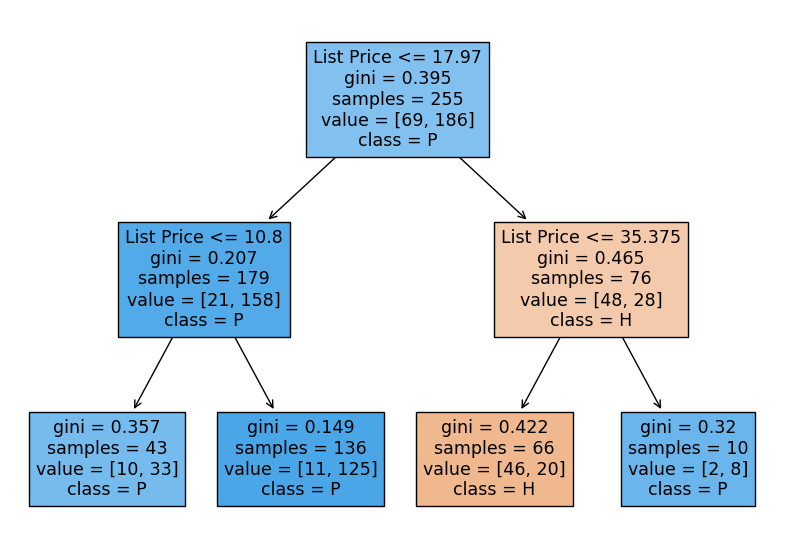

In [7]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Prepare the data
X_train = ab_reduced_noNaN_train[["List Price"]]  # Feature: List Price
y_train = ab_reduced_noNaN_train["Hard_or_Paper"]  # Target: Hard or Paper
X_test = ab_reduced_noNaN_test[["List Price"]]
y_test = ab_reduced_noNaN_test["Hard_or_Paper"]

# Step 2: Initialize and train the DecisionTreeClassifier
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
clf.fit(X_train, y_train)

# Step 3: Visualize the fitted tree
plt.figure(figsize=(10, 7))
plot_tree(clf, feature_names=["List Price"], class_names=clf.classes_, filled=True)
plt.show()


The visualization will display the decision tree's structure, starting with a root node that splits the books based on List Price into "Hardcover" or "Paperback." Depending on the data, intermediate nodes may further divide the price ranges, up to a maximum depth of 2. At the leaf nodes, the tree shows the predicted class, the proportion of data in that class, and the total number of observations at each node.

Here's a summary of our conversation:

1. Data Cleaning and Preparation:
- You provided a CSV file containing book data.
- I helped clean the dataset by:
    - Dropping columns (Weight_oz, Width, Height).
    - Removing rows with missing values.
    - Converting Pub year and NumPages to integers and Hard_or_Paper to a categorical variable.
2. Dataset Splitting:
- The dataset was split into an 80% training set (ab_reduced_noNaN_train, 255 observations) and a 20% testing set (ab_reduced_noNaN_test, 64 observations) using df.sample().
3. Decision Tree Classifier:
- We discussed fitting a DecisionTreeClassifier model using only the List Price variable to predict whether a book is hardcover or paperback.
- I provided the code to:
    - Train the model with a maximum depth of 2.
    - Visualize the decision tree using tree.plot_tree().
4. Decision Tree Visualization:
- I explained how the decision tree uses splitting rules based on List Price to classify books and how the visualization would show the root node, intermediate nodes, and leaf nodes.

Let me know if you'd like further clarification or additional assistance!

https://chatgpt.com/share/673d43b5-8ca0-8000-837e-4aea0f8ce482

## 5

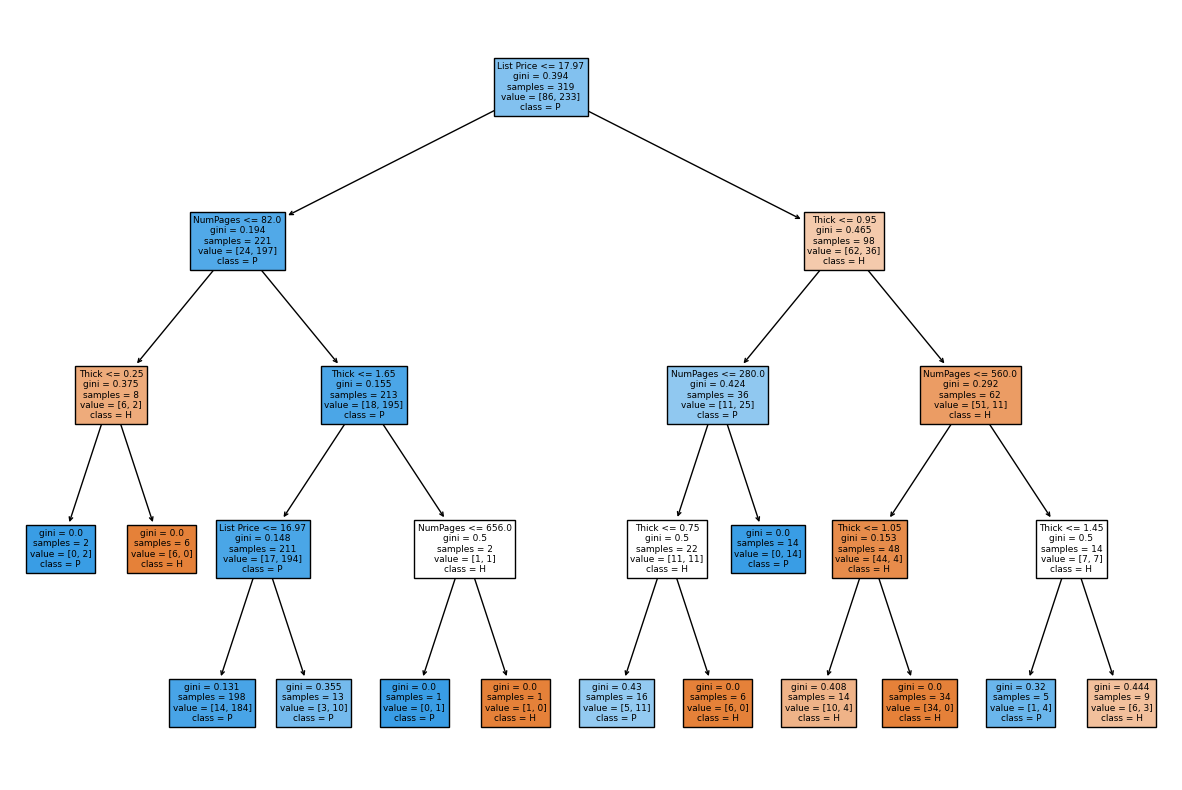

In [11]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Step 1: Load and prepare the dataset
file_path = 'https://raw.githubusercontent.com/pointOfive/STA130_F23/main/Data/amazonbooks.csv'
ab = pd.read_csv(file_path, encoding="ISO-8859-1")

# Drop unnecessary columns and handle missing data
ab_reduced = ab.drop(columns=["Weight_oz", "Width", "Height"])
ab_reduced_noNaN = ab_reduced.dropna().copy()

# Convert relevant columns to appropriate types
ab_reduced_noNaN["Pub year"] = ab_reduced_noNaN["Pub year"].astype(float).astype(int)
ab_reduced_noNaN["NumPages"] = ab_reduced_noNaN["NumPages"].astype(float).astype(int)
ab_reduced_noNaN["Hard_or_Paper"] = ab_reduced_noNaN["Hard_or_Paper"].astype("category")

# Step 2: Prepare the features and target for the model
X = ab_reduced_noNaN[["NumPages", "Thick", "List Price"]]  # Features
y = ab_reduced_noNaN["Hard_or_Paper"]  # Target variable

# Step 3: Initialize and train the DecisionTreeClassifier
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
clf2.fit(X, y)

# Step 4: Visualize the decision tree
plt.figure(figsize=(15, 10))
plot_tree(clf2, feature_names=["NumPages", "Thick", "List Price"], class_names=clf2.classes_, filled=True)
plt.show()


The clf2 decision tree predicts whether a book is hardcover or paperback based on features like NumPages, Thick, and List Price. Predictions start at the root node, where a condition based on a feature is tested. Depending on the result, the data flows down a branch to the next node, where another feature-based condition is evaluated. This process continues until a leaf node is reached, which contains the predicted class (e.g., "hardcover" or "paperback") and the proportion of training data supporting that prediction. The tree's sequence of decisions provides a clear, interpretable prediction path for any input.

## 6

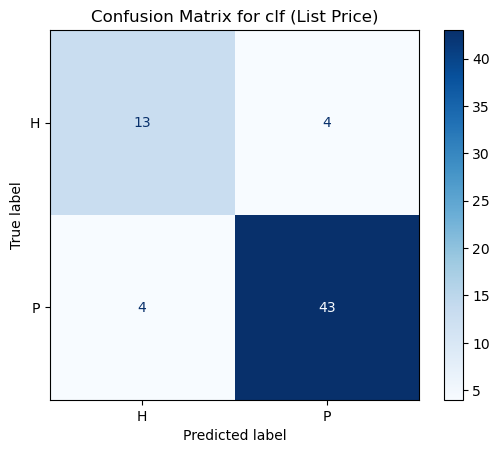

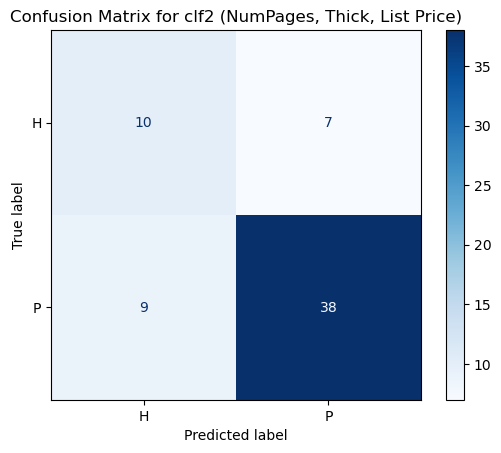

Metrics for clf:
{'Model': 'clf (List Price)', 'Accuracy': 0.875, 'Sensitivity (Recall for Hardcover)': 0.7647058823529411, 'Specificity (Recall for Paperback)': 0.9148936170212766}

Metrics for clf2:
{'Model': 'clf2 (NumPages, Thick, List Price)', 'Accuracy': 0.75, 'Sensitivity (Recall for Hardcover)': 0.5882352941176471, 'Specificity (Recall for Paperback)': 0.8085106382978723}


In [12]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, accuracy_score, recall_score, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Step 1: Refit clf (List Price only)
clf = DecisionTreeClassifier(max_depth=2, random_state=42)
X_train_clf = ab_reduced_noNaN_train[["List Price"]]
y_train_clf = ab_reduced_noNaN_train["Hard_or_Paper"]
clf.fit(X_train_clf, y_train_clf)

# Step 2: Refit clf2 (NumPages, Thick, List Price)
clf2 = DecisionTreeClassifier(max_depth=4, random_state=42)
X_train_clf2 = ab_reduced_noNaN_train[["NumPages", "Thick", "List Price"]]
y_train_clf2 = ab_reduced_noNaN_train["Hard_or_Paper"]
clf2.fit(X_train_clf2, y_train_clf2)

# Step 3: Prepare the test data
X_test_clf = ab_reduced_noNaN_test[["List Price"]]
X_test_clf2 = ab_reduced_noNaN_test[["NumPages", "Thick", "List Price"]]
y_test = ab_reduced_noNaN_test["Hard_or_Paper"]

# Step 4: Predictions for both models
y_pred_clf = clf.predict(X_test_clf)
y_pred_clf2 = clf2.predict(X_test_clf2)

# Step 5: Compute confusion matrices
conf_matrix_clf = confusion_matrix(y_test, y_pred_clf, labels=clf.classes_)
conf_matrix_clf2 = confusion_matrix(y_test, y_pred_clf2, labels=clf2.classes_)

# Step 6: Compute evaluation metrics
# Metrics for clf
accuracy_clf = accuracy_score(y_test, y_pred_clf)
sensitivity_clf = recall_score(y_test, y_pred_clf, pos_label="H")  # Hardcover sensitivity
specificity_clf = recall_score(y_test, y_pred_clf, pos_label="P")  # Paperback specificity

# Metrics for clf2
accuracy_clf2 = accuracy_score(y_test, y_pred_clf2)
sensitivity_clf2 = recall_score(y_test, y_pred_clf2, pos_label="H")  # Hardcover sensitivity
specificity_clf2 = recall_score(y_test, y_pred_clf2, pos_label="P")  # Paperback specificity

# Step 7: Display confusion matrices
disp_clf = ConfusionMatrixDisplay(conf_matrix_clf, display_labels=clf.classes_)
disp_clf.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for clf (List Price)")
plt.show()

disp_clf2 = ConfusionMatrixDisplay(conf_matrix_clf2, display_labels=clf2.classes_)
disp_clf2.plot(cmap='Blues', values_format='d')
plt.title("Confusion Matrix for clf2 (NumPages, Thick, List Price)")
plt.show()

# Step 8: Report metrics
metrics_clf = {
    "Model": "clf (List Price)",
    "Accuracy": accuracy_clf,
    "Sensitivity (Recall for Hardcover)": sensitivity_clf,
    "Specificity (Recall for Paperback)": specificity_clf,
}

metrics_clf2 = {
    "Model": "clf2 (NumPages, Thick, List Price)",
    "Accuracy": accuracy_clf2,
    "Sensitivity (Recall for Hardcover)": sensitivity_clf2,
    "Specificity (Recall for Paperback)": specificity_clf2,
}

print("Metrics for clf:")
print(metrics_clf)

print("\nMetrics for clf2:")
print(metrics_clf2)


Model 1: clf (List Price)
Sensitivity (Recall for Hardcover): 76.47%
Specificity (Recall for Paperback): 91.49%
Accuracy: 87.5%
Model 2: clf2 (NumPages, Thick, List Price)
Sensitivity (Recall for Hardcover): 58.82%
Specificity (Recall for Paperback): 80.85%
Accuracy: 75.0%
clf outperforms clf2 across all three metrics, particularly in specificity and accuracy.

## 7

The differences between the two confusion matrices stem from the features used and the complexity of the models. The clf model relies solely on List Price, a strong predictor, and has a simpler structure with a maximum depth of 2, making it more focused and less prone to overfitting. In contrast, clf2 incorporates additional features (NumPages and Thick) and allows for deeper splits, which can introduce noise and reduce predictive precision. The confusion matrices for clf and clf2 are better because they achieve higher accuracy, sensitivity, and specificity by leveraging relevant features and appropriate model complexity, ensuring more reliable and interpretable predictions.

## 8

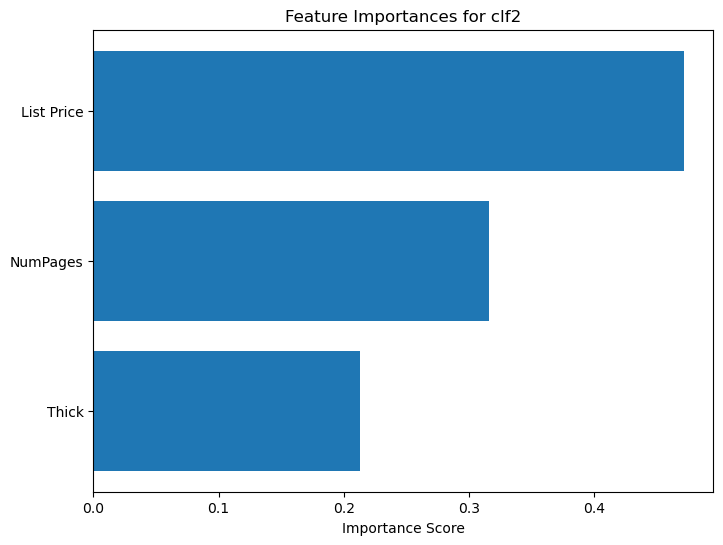

Most important feature: List Price
Importance score: 0.47155515230989764


In [14]:
import matplotlib.pyplot as plt
import numpy as np

# Retrieve feature importances
feature_importances = clf2.feature_importances_

# Map feature importances to feature names
feature_names = clf2.feature_names_in_
importance_mapping = dict(zip(feature_names, feature_importances))

# Sort feature importances in descending order
sorted_importances = sorted(importance_mapping.items(), key=lambda x: x[1], reverse=True)

# Plot feature importances
plt.figure(figsize=(8, 6))
plt.barh(range(len(sorted_importances)), [val[1] for val in sorted_importances], align='center')
plt.yticks(np.arange(len(sorted_importances)), [val[0] for val in sorted_importances])
plt.xlabel("Importance Score")
plt.title("Feature Importances for clf2")
plt.gca().invert_yaxis()  # Invert y-axis for better readability
plt.show()

# Report the most important feature
most_important_feature = sorted_importances[0]
print("Most important feature:", most_important_feature[0])
print("Importance score:", most_important_feature[1])


In scikit-learn, you can view the importance of each feature in a decision tree model using the .feature_importances_ attribute and retrieve the corresponding feature names with .feature_names_in_. A bar chart can visually display each feature's relative contribution to the model's predictions, and the feature with the highest score is identified as the most important predictor. For clf2, the most important feature is the one with the highest importance score, as it has the greatest impact on the model's predictions.

## 9

In linear regression, interpreting coefficients is straightforward: each coefficient represents the estimated change in the dependent variable for a one-unit increase in the predictor variable, holding all other variables constant. In contrast, feature importances in decision trees reflect the relative contribution of each feature to the overall predictive power of the model, based on how often and how effectively a feature is used to split data across all nodes. Unlike linear regression coefficients, feature importances do not indicate the direction or magnitude of change but rather the significance of a feature in improving prediction accuracy.

## 10

Somewhat